# PyTorch Fundamentals

## Initialization

In [346]:
# Load libraries

# OS
import time

# Data manipulation
import numpy as np
import matplotlib.pyplot as plt

# Modeling
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

print(torch.__version__)
!nvidia-smi # check if GPU is available

2.2.0
zsh:1: command not found: nvidia-smi


## Tensors

<center>
<table>
    <thead>
        <tr>
            <th style="text-align: center;">PyTorch Tensors Dimensions</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="tensor_dims.png" alt="PyTorch Tensors Dimensions" height="400">
            </td>
        </tr>
    </tbody>
</table>
</center>

In [347]:
# Create tensor examples
x = torch.tensor([[1, 2]])
y = torch.tensor([[1], [2]])

In [348]:
# Print shape and data type
print(x.shape, "- One entity of two items")
print(y.shape, "- Two entities of one item each")
print("Data type:", x.dtype)

torch.Size([1, 2]) - One entity of two items
torch.Size([2, 1]) - Two entities of one item each
Data type: torch.int64


In [349]:
# Show how datatype can be changed to the most generic type
x = torch.tensor([False, 1, 2.0])
print(x)
print("Data type:", x.dtype)

tensor([0., 1., 2.])
Data type: torch.float32


In [350]:
# Create tensor examples similar to numpy zeros and ones
x = torch.zeros(2, 3)
y = torch.ones(4, 3)

print(x, end="\n\n")
print(y)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [351]:
# Create tensor examples similar to numpy arange and linspace
x = torch.arange(0, 10, 2) # Start at 0, stop at 10, step by 2
y = torch.linspace(0, 10, 6) # Start at 0, stop at 10, 6 elements

print(x, end="\n\n")
print(y)

tensor([0, 2, 4, 6, 8])

tensor([ 0.,  2.,  4.,  6.,  8., 10.])


In [352]:
# Create tensor examples similar to numpy randints, rand, and randn
x = torch.randint(low=0, high=10, size=(4, 3)) # Includes 0, excludes 10
y = torch.rand(3,4) # Uniform distribution between 0 and 1
z = torch.randn(3,4) # Standard normal distribution

print(x, end="\n\n")
print(y, end="\n\n")
print(z)

tensor([[3, 5, 9],
        [5, 7, 7],
        [4, 1, 0],
        [1, 6, 3]])

tensor([[0.0922, 0.4813, 0.1965, 0.8165],
        [0.7593, 0.0737, 0.2427, 0.2488],
        [0.2342, 0.9695, 0.3033, 0.1053]])

tensor([[-0.2674, -0.1885,  0.1637,  1.6117],
        [-1.3278,  1.6525, -0.3617,  0.2357],
        [ 0.8548,  0.5895,  1.2126, -0.8767]])


In [353]:
# Create numpy array and convert to pytorch tensor
x = np.array([[1, 2], [3, 4]])
y = torch.tensor(x)

print("Numpy array:\n", x, end="\n\n")
print("Pytorch tensor:\n", y)

Numpy array:
 [[1 2]
 [3 4]]

Pytorch tensor:
 tensor([[1, 2],
        [3, 4]])


## Tensor operations

In [354]:
# Example of broadcast multiplication
x = torch.tensor([[1, 2], [3, 4]])
y = x * 2

print("Original tensor:\n", x, end="\n\n")
print("Broadcast multiplication (x2):\n", y) # Multiply all elements by 2

Original tensor:
 tensor([[1, 2],
        [3, 4]])

Broadcast multiplication (x2):
 tensor([[2, 4],
        [6, 8]])


In [355]:
# Example of element-wise multiplication
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])
z = x * y

print("Matrix x:\n", x, end="\n\n")
print("Matrix y:\n", y, end="\n\n")
print("Element-wise multiplication:\n", z)

Matrix x:
 tensor([[1, 2],
        [3, 4]])

Matrix y:
 tensor([[5, 6],
        [7, 8]])

Element-wise multiplication:
 tensor([[ 5, 12],
        [21, 32]])


In [356]:
# Example of broadcast addition
x = torch.tensor([[1, 2], [3, 4]])
y = x + 10

print("Original tensor:\n", x, end="\n\n")
print("Broadcast addition (+10):\n", y) # Add 10 to all elements

Original tensor:
 tensor([[1, 2],
        [3, 4]])

Broadcast addition (+10):
 tensor([[11, 12],
        [13, 14]])


In [357]:
# Example of element-wise addition
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])
z = x + y

print("Matrix x:\n", x, end="\n\n")
print("Matrix y:\n", y, end="\n\n")
print("Element-wise addition:\n", z)

Matrix x:
 tensor([[1, 2],
        [3, 4]])

Matrix y:
 tensor([[5, 6],
        [7, 8]])

Element-wise addition:
 tensor([[ 6,  8],
        [10, 12]])


In [358]:
# Example of tensor reshaping (reshaping must be compatible with original shape, i.e. same number of elements)
x = torch.arange(0, 12) # 1D tensor with 12 elements
y = x.reshape(3, 4) # 2D tensor with 3 rows and 4 columns

print("Original tensor:\n", x, end="\n\n")
print("Reshaped tensor:\n", y)

Original tensor:
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Reshaped tensor:
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [359]:
# Example of tensor view (same as reshape but returns a pointer to the original tensor)
x = torch.arange(0, 10) # 1D tensor - 1 row, 10 columns = 10 elements
y = x.view(2, 5) # 2D tensor - 2 rows, 5 columns = 10 elements

print("Original tensor:\n", x)
print("Shape of original tensor:", x.shape, end="\n\n")
print("Reshaped tensor:\n", y)
print("Shape of reshaped tensor:", y.shape, end="\n\n")

# Modify the reshaped tensor and see the original tensor change
y[0, 0] = 100
print("Original tensor after modification:\n", x)

Original tensor:
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Shape of original tensor: torch.Size([10])

Reshaped tensor:
 tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
Shape of reshaped tensor: torch.Size([2, 5])

Original tensor after modification:
 tensor([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])


In [360]:
# Example of squeezing and unsqueezing tensors (Only applicable to tensors with 1 dimension)
x = torch.randn(3, 1, 4) # 3D tensor - 3 rows, 1 column, 4 depth = 12 elements
y = x.squeeze() # 2D tensor - 3 rows, 4 columns = 12 elements
z = x.unsqueeze(0) # 4D tensor - 1 row, 3 columns, 1 depth, 4 height = 12 elements, adds a dimension at the beginning (index 0)

print("Original tensor:\n", x)
print("Shape of original tensor:", x.shape, end="\n\n")
print("Squeezed tensor:\n", y)
print("Shape of squeezed tensor:", y.shape, end="\n\n")
print("Unsqueezed tensor:\n", z)
print("Shape of unsqueezed tensor:", z.shape)

Original tensor:
 tensor([[[-0.7522,  1.2519,  0.1423,  0.5784]],

        [[ 0.0048, -1.5143,  0.8020, -0.3242]],

        [[-1.4104,  0.4592, -0.6838,  0.1992]]])
Shape of original tensor: torch.Size([3, 1, 4])

Squeezed tensor:
 tensor([[-0.7522,  1.2519,  0.1423,  0.5784],
        [ 0.0048, -1.5143,  0.8020, -0.3242],
        [-1.4104,  0.4592, -0.6838,  0.1992]])
Shape of squeezed tensor: torch.Size([3, 4])

Unsqueezed tensor:
 tensor([[[[-0.7522,  1.2519,  0.1423,  0.5784]],

         [[ 0.0048, -1.5143,  0.8020, -0.3242]],

         [[-1.4104,  0.4592, -0.6838,  0.1992]]]])
Shape of unsqueezed tensor: torch.Size([1, 3, 1, 4])


In [361]:
# Using None to unsqueeze tensor
x = torch.randn(3, 4) # 2D tensor - 3 rows, 4 columns = 12 elements
y1 = x[None] # 3D tensor - 1 row, 3 columns, 4 depth = 12 elements
y2 = x[:, None] # 3D tensor - 3 rows, 1 column, 4 depth = 12 elements
y3 = x[..., None] # 3D tensor - 3 rows, 4 columns, 1 depth = 12 elements

print("Original tensor:\n", x)
print("Shape of original tensor:", x.shape, end="\n\n")
print("Shape of unsqueezed tensor with added dimension (None) at the beginning:", y1.shape, end="\n\n")
print("Shape of unsqueezed tensor with added dimension (None) after the first dimension:", y2.shape, end="\n\n")
print("Shape of unsqueezed tensor with added dimension (None) after the last dimension:", y3.shape)

Original tensor:
 tensor([[ 0.0274, -0.6990,  1.5896, -0.2594],
        [-0.5487,  2.0633,  1.0888,  0.4072],
        [-0.6571, -2.4117, -1.4705,  1.7409]])
Shape of original tensor: torch.Size([3, 4])

Shape of unsqueezed tensor with added dimension (None) at the beginning: torch.Size([1, 3, 4])

Shape of unsqueezed tensor with added dimension (None) after the first dimension: torch.Size([3, 1, 4])

Shape of unsqueezed tensor with added dimension (None) after the last dimension: torch.Size([3, 4, 1])


In [362]:
# Example of matrix multiplication (dot product)
x = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
y = torch.tensor([[1, 2], [3, 4], [5, 6], [7, 8]])
z = x @ y # torch.matmul(x, y) or x.matmul(y) also work

print("Matrix x (3x4):\n", x, end="\n\n")
print("Matrix y (4x2):\n", y, end="\n\n")
print("Matrix multiplication (dot product) (3x2):\n", z)

Matrix x (3x4):
 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Matrix y (4x2):
 tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

Matrix multiplication (dot product) (3x2):
 tensor([[ 50,  60],
        [114, 140],
        [178, 220]])


In [363]:
# Example of tensor concatenation (along rows and columns)
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
y = torch.tensor([[7, 8, 9], [10, 11, 12]])
z = torch.cat([x, y], dim=0) # Concatenate along rows
w = torch.cat([x, y], dim=1) # Concatenate along columns

print("Matrix x shape:\n", x.shape)
print("Matrix y shape:\n", y.shape)
print("Concatenated matrix shape (along rows):\n", z.shape)
print("Concatenated matrix shape (along columns):\n", w.shape)

Matrix x shape:
 torch.Size([2, 3])
Matrix y shape:
 torch.Size([2, 3])
Concatenated matrix shape (along rows):
 torch.Size([4, 3])
Concatenated matrix shape (along columns):
 torch.Size([2, 6])


In [364]:
# Example of tensor stacking (along rows and columns)
# 2x3
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
y = torch.tensor([[7, 8, 9], [10, 11, 12]])
z = torch.stack([x, y], dim=0) # Stack along rows
w = torch.stack([x, y], dim=1) # Stack along columns

print("Matrix x shape:\n", x.shape)
print("Matrix y shape:\n", y.shape)
print("Stacked matrix shape (along rows):\n", z.shape)
print("Stacked matrix shape (along columns):\n", w.shape)

Matrix x shape:
 torch.Size([2, 3])
Matrix y shape:
 torch.Size([2, 3])
Stacked matrix shape (along rows):
 torch.Size([2, 2, 3])
Stacked matrix shape (along columns):
 torch.Size([2, 2, 3])


In [365]:
# Example of max and argmax
x = torch.arange(0, 10).reshape(2, 5)
y = torch.max(x) # Maximum value
flipped_x = torch.flip(x, [0]) # Flip along rows
max_idx = torch.argmax(flipped_x) # Index of maximum value

print("Original tensor:\n", x)
print("Maximum value:", y, end="\n\n")
print("Flipped tensor:\n", flipped_x)
print("Index of maximum value in flipped tensor:", max_idx, end="\n\n")

max_val_row, max_idx_row = x.max(dim=0) # Maximum value and index along rows
max_val_col, max_idx_col = x.max(dim=1) # Maximum value and index along columns

print("Maximum value and index along rows:\n", max_val_row, max_idx_row, end="\n\n")
print("Maximum value and index along columns:\n", max_val_col, max_idx_col)

Original tensor:
 tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
Maximum value: tensor(9)

Flipped tensor:
 tensor([[5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4]])
Index of maximum value in flipped tensor: tensor(4)

Maximum value and index along rows:
 tensor([5, 6, 7, 8, 9]) tensor([1, 1, 1, 1, 1])

Maximum value and index along columns:
 tensor([4, 9]) tensor([4, 4])


In [366]:
# Example of tensor permutation
x = torch.randn(3, 4, 2) # 3D tensor - 3 rows, 4 columns, 2 depth = 24 elements
y = x.permute(2, 0, 1) # 3D tensor - 2 rows, 3 columns, 4 depth = 24 elements

print("Original tensor:\n", x)
print("Shape of original tensor:", x.shape, end="\n\n")
print("Permuted tensor:\n", y)
print("Shape of permuted tensor:", y.shape)

# NOTE: Never reshape (view) a tensor to swap dimensions, use permute instead. Reshaping will change the order of the elements.

Original tensor:
 tensor([[[ 0.5267,  0.5536],
         [-0.1666,  0.6430],
         [-1.8697, -1.1276],
         [ 0.2186,  1.3999]],

        [[-1.0763,  0.0458],
         [ 0.1899,  1.4948],
         [ 0.6514, -0.8330],
         [ 0.0489, -0.4956]],

        [[-0.5561, -1.5886],
         [ 1.9554,  0.8477],
         [ 0.0071,  1.3879],
         [ 0.4019, -0.3124]]])
Shape of original tensor: torch.Size([3, 4, 2])

Permuted tensor:
 tensor([[[ 0.5267, -0.1666, -1.8697,  0.2186],
         [-1.0763,  0.1899,  0.6514,  0.0489],
         [-0.5561,  1.9554,  0.0071,  0.4019]],

        [[ 0.5536,  0.6430, -1.1276,  1.3999],
         [ 0.0458,  1.4948, -0.8330, -0.4956],
         [-1.5886,  0.8477,  1.3879, -0.3124]]])
Shape of permuted tensor: torch.Size([2, 3, 4])


In [367]:
# List of all available operations on tensors
dir(torch.Tensor)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__cuda_array_interface__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__'

## Auto gradient on Tensors

In [368]:
# Create a tensor with a gradient
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32, requires_grad=True)
print(x, end="\n\n")

# Define an output based on Sum(x^2)
output = x.pow(2).sum()

# Compute the gradient - Should be 2x
output.backward()

print(x.grad) # Gradient of the output with respect to x

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

tensor([[2., 4.],
        [6., 8.]])


### Perform a dot product on CPU vs GPU

In [369]:
# Create random tensors
x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on:", device)

if device.type == "cuda":
    # Move tensors to GPU
    x, y = x.to(device), y.to(device)

    # Perform matrix multiplication
    %timeit z = x @ y

# Move tensors back to CPU
x, y = x.to("cpu"), y.to("cpu")

# Perform matrix multiplication
%timeit z = x @ y

# Create random Numpy arrays
x = np.random.rand(1, 6400)
y = np.random.rand(6400, 5000)

# Perform matrix multiplication
%timeit z = x @ y

Running on: cpu
7.02 ms ± 491 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14 ms ± 519 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Neural Network Example

In [370]:
# Create simple input and output for a simple sum operation
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

# Convert to tensors
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x, y = x.to(device), y.to(device)

In [371]:
# Define Neural Network architecture
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)

    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [372]:
# Create instance of Neural Network
mynet = MyNeuralNet().to(device)

# Print Neural Network architecture and initial weights
print("Architecture:\n", mynet, end="\n\n")
print("Initial weights:\n", mynet.input_to_hidden_layer.weight, "\n", mynet.hidden_to_output_layer.weight)

Architecture:
 MyNeuralNet(
  (input_to_hidden_layer): Linear(in_features=2, out_features=8, bias=True)
  (hidden_layer_activation): ReLU()
  (hidden_to_output_layer): Linear(in_features=8, out_features=1, bias=True)
)

Initial weights:
 Parameter containing:
tensor([[-0.0185, -0.2584],
        [-0.3129, -0.1787],
        [-0.1407, -0.3075],
        [ 0.1217,  0.5616],
        [ 0.6163, -0.0212],
        [ 0.6037,  0.0130],
        [-0.4287,  0.1444],
        [ 0.4752, -0.6051]], requires_grad=True) 
 Parameter containing:
tensor([[-0.0375, -0.2868,  0.0039, -0.2987,  0.1353, -0.2881, -0.1616,  0.3328]],
       requires_grad=True)


In [373]:
# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = SGD(mynet.parameters(), lr=0.001)

# Print loss and optimizer details
print("Loss:", loss_fn, end="\n\n")
print("Optimizer:", optimizer)

Loss: MSELoss()

Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


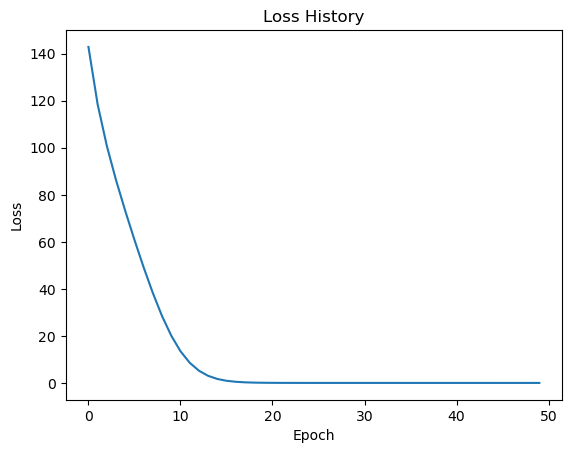

Final loss: tensor(0.0393, grad_fn=<MseLossBackward0>)



In [374]:
# Perform training loop
history = []
epochs = 50

for _ in range(epochs):
    # Forward pass
    loss = loss_fn(mynet(x), y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss
    history.append(loss.item())

# Plot loss history and print final loss
%matplotlib inline
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.show()
print("Final loss:", loss, end="\n\n")

## DataLoader and Batch Size

In [375]:
# Create a simple dataset
x = torch.tensor([[1, 2], [3, 4], [5, 6], [7, 8]], dtype=torch.float32)
y = torch.tensor([[3], [7], [11], [15]], dtype=torch.float32)

# Move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x, y = x.to(device), y.to(device)

In [376]:
# Create a Dataset class
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.x)

In [377]:
# Create instance of Dataset
dataset = MyDataset(x, y)

# Create DataLoader instance
data_loader = DataLoader(dataset, batch_size=2, shuffle=True)

# Create instance of Neural Network
mynet = MyNeuralNet().to(device)

# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = SGD(mynet.parameters(), lr=0.001)

Time taken: 0.05776095390319824 seconds


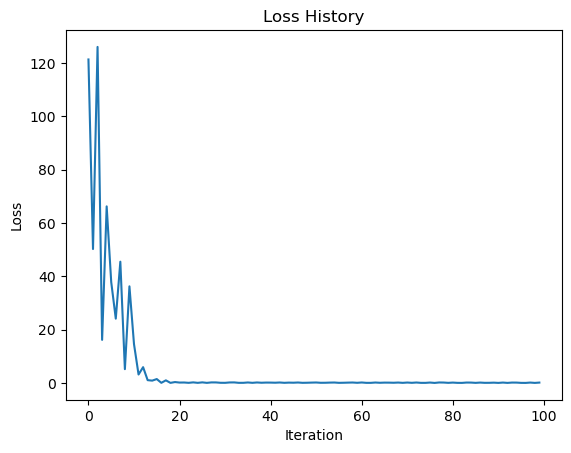

In [378]:
# Perform training loop
history = []
epochs = 50
start = time.time()

for _ in range(epochs):
    for x_batch, y_batch in data_loader:
        # Forward pass
        loss = loss_fn(mynet(x_batch), y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save loss
        history.append(loss.item())

end = time.time()
print("Time taken:", end - start, "seconds")

# Plot loss history and print final loss
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss History")
plt.show()

In [379]:
# Create validation dataset to test the model
x_val = torch.tensor([[10,11]], dtype=torch.float32)

# Move tensors to GPU if available
x_val = x_val.to(device)

# Perform inference
mynet.eval()
with torch.no_grad():
    y_val = mynet(x_val)

print("Inference result:", y_val.item())

Inference result: 20.29881477355957


## Custom Loss Function

In [380]:
# Create a simple dataset
x = torch.tensor([[1, 2], [3, 4], [5, 6], [7, 8]], dtype=torch.float32)
y = torch.tensor([[3], [7], [11], [15]], dtype=torch.float32)

# Move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x, y = x.to(device), y.to(device)

# Create instance of Dataset
dataset = MyDataset(x, y)

# Create DataLoader instance
data_loader = DataLoader(dataset, batch_size=2, shuffle=True)

# Create instance of Neural Network
mynet = MyNeuralNet().to(device)

In [381]:
# Create custom loss function
def custom_MSE(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

# Define loss function and optimizer
loss_fn = custom_MSE
optimizer = SGD(mynet.parameters(), lr=0.001)

Time taken: 0.05312919616699219 seconds


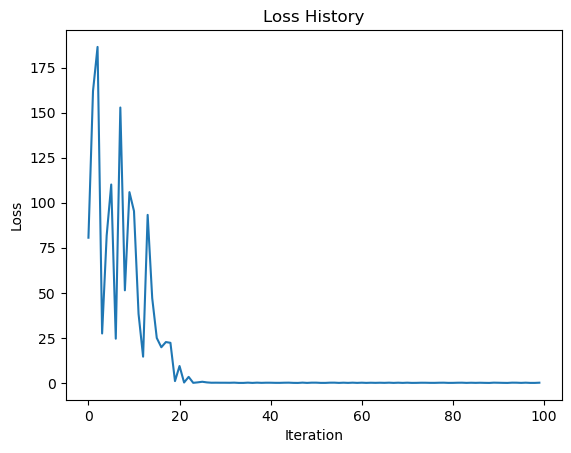

In [382]:
# Perform training loop
history = []
epochs = 50
start = time.time()

for _ in range(epochs):
    for x_batch, y_batch in data_loader:
        # Forward pass
        loss = loss_fn(mynet(x_batch), y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save loss
        history.append(loss.item())

end = time.time()
print("Time taken:", end - start, "seconds")

# Plot loss history and print final loss
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss History")
plt.show()

## Fetching values of intermediate layers

### Getting intermediate values directly calling layers as functions

In [383]:
# Get intermediate layer output from the Neural Network
input_to_hidden_layer_output = mynet.input_to_hidden_layer(x)
hidden_layer_activation_output = mynet.hidden_layer_activation(input_to_hidden_layer_output)

print("Hidden layer activation output:\n", hidden_layer_activation_output)

Hidden layer activation output:
 tensor([[ 0.0000,  0.0000,  2.4253,  0.0000,  1.2227,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  5.2149,  0.0000,  3.0014,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  8.0044,  0.0000,  4.7800,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, 10.7940,  0.0000,  6.5586,  0.0000,  0.0000,  0.0000]],
       grad_fn=<ReluBackward0>)


### Getting intermediate values by returning them on the forward pass

In [384]:
# Redifine Neural Network architecture to include intermediate layer output
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)

    def forward(self, x):
        hidden1 = self.input_to_hidden_layer(x)
        hidden2 = self.hidden_layer_activation(hidden1)
        return self.hidden_to_output_layer(hidden2), hidden2

In [385]:
# Create instance of Neural Network
mynet = MyNeuralNet().to(device)

# Access the intermediate layer output
hidden_layer_output = mynet(x)[1]

print("Hidden layer output:\n", hidden_layer_output)

Hidden layer output:
 tensor([[0.0000, 0.8545, 0.7394, 0.6401, 0.0000, 0.0000, 0.7552, 0.0000],
        [0.3198, 1.5657, 2.1703, 1.3385, 0.0000, 0.0000, 0.7971, 0.0000],
        [0.6990, 2.2770, 3.6012, 2.0368, 0.0000, 0.0000, 0.8390, 0.0000],
        [1.0783, 2.9882, 5.0321, 2.7352, 0.0000, 0.0000, 0.8808, 0.0000]],
       grad_fn=<ReluBackward0>)


## Building a sequential Neural Network

In [386]:
# Create a simple dataset
x = torch.tensor([[1, 2], [3, 4], [5, 6], [7, 8]], dtype=torch.float32)
y = torch.tensor([[3], [7], [11], [15]], dtype=torch.float32)

# Move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x, y = x.to(device), y.to(device)

# Create instance of Dataset
dataset = MyDataset(x, y)

# Create DataLoader instance
data_loader = DataLoader(dataset, batch_size=2, shuffle=True)

In [387]:
# Define Neural Network architecture using Sequential
mynet = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

# Print summary of Neural Network architecture
summary(mynet, input_size=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 8]              24
              ReLU-2                    [-1, 8]               0
            Linear-3                    [-1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [388]:
# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = SGD(mynet.parameters(), lr=0.001)

Time taken: 0.05411195755004883 seconds


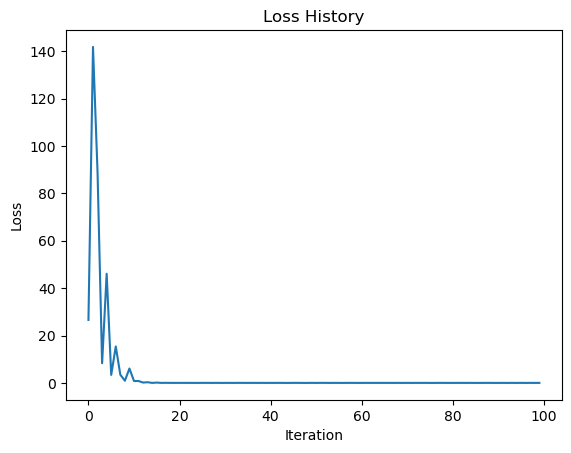

In [389]:
# Perform training loop
history = []
epochs = 50
start = time.time()

for _ in range(epochs):
    for x_batch, y_batch in data_loader:
        # Forward pass
        loss = loss_fn(mynet(x_batch), y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save loss
        history.append(loss.item())

end = time.time()
print("Time taken:", end - start, "seconds")

# Plot loss history and print final loss
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss History")
plt.show()

In [390]:
# Create validation dataset to test the model
x_val = torch.tensor([[8,9], [10,11], [1.5,2.5]], dtype=torch.float32)
# Move tensors to GPU if available
x_val = x_val.to(device)

# Perform inference
mynet.eval()
with torch.no_grad():
    y_val = mynet(x_val)

print("Inference results:\n", y_val)

Inference results:
 tensor([[16.8662],
        [20.7752],
        [ 4.1621]])


## Saving and loading a PyTorch model

State dict contains a snapshot of the model's state (weights and biases)

In [391]:
# Print Neural Network state_dict
print("State dict:\n", mynet.state_dict())

State dict:
 OrderedDict([('0.weight', tensor([[-0.6587,  0.1696],
        [ 0.8776,  0.0664],
        [-0.6996, -0.3557],
        [ 0.3298,  0.8922],
        [ 0.4643,  0.4190],
        [-0.2329,  0.6310],
        [-0.2409,  0.2260],
        [-0.3763,  0.5140]])), ('0.bias', tensor([-0.3985,  0.0694,  0.6484, -0.3992,  0.6130, -0.4971,  0.0151,  0.3190])), ('2.weight', tensor([[-0.2849,  0.6276, -0.2188,  0.7802,  0.3093,  0.3532,  0.1982, -0.0167]])), ('2.bias', tensor([0.3601]))])


### Saving

In [392]:
# Save Neural Network state_dict to file (move to CPU)
torch.save(mynet.to("cpu").state_dict(), "mynet.pth")

### Loading

In [393]:
# Create empty Neural Network instance
mynet2 = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

# Load Neural Network state_dict from file
mynet2.load_state_dict(torch.load("mynet.pth"))

<All keys matched successfully>

In [394]:
# Move Neural Network to GPU if available
mynet2.to(device)

# Perform inference
mynet2.eval()
with torch.no_grad():
    y_val = mynet2(x_val)

print("Inference results:\n", y_val)

Inference results:
 tensor([[16.8662],
        [20.7752],
        [ 4.1621]])
